In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from keras.layers import Dense
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

C:\Users\Vaibhavi\AppData\Local\Temp\ipykernel_14176\1857935062.py:12: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
forest_df = pd.read_csv('forestfires.csv')

In [3]:
forest_df.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [4]:
forest_df.tail(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
507,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
509,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,...,0,0,0,0,0,0,0,0,0,small
510,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
511,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,...,0,0,0,0,0,0,0,0,0,small
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [5]:
forest_df.shape

(517, 31)

In [6]:
forest_df.columns


Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

# EDA

In [7]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
forest_df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
forest_df.isna().sum().sum()

0

In [10]:
#No Missing value found

# Data Visualization

<AxesSubplot:xlabel='month', ylabel='count'>

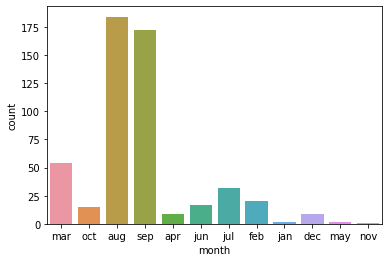

In [11]:
sns.countplot(data=forest_df,x=forest_df['month'])

<AxesSubplot:xlabel='day', ylabel='count'>

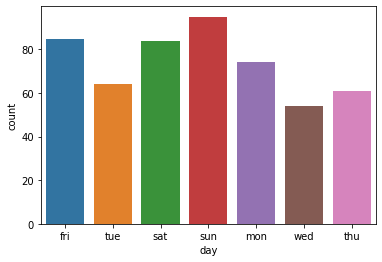

In [12]:
sns.countplot(data=forest_df,x=forest_df['day'])

<AxesSubplot:title={'center':'Scatter Plot between Temperature and Area'}, xlabel='Tempratue', ylabel='Area'>

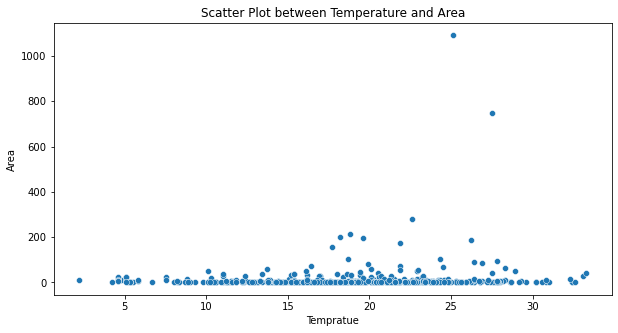

In [13]:
#Scatter plot between Area and Temperature
plt.figure(figsize=(10,5))
plt.xlabel('Tempratue')
plt.ylabel('Area')
plt.title('Scatter Plot between Temperature and Area')
sns.scatterplot(forest_df['temp'],forest_df['area'])

<AxesSubplot:xlabel='area', ylabel='Density'>

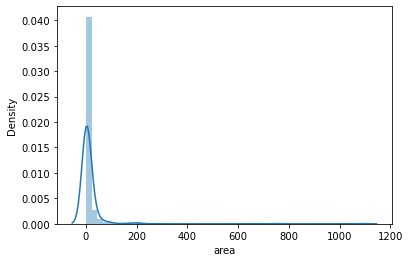

In [14]:
sns.distplot(forest_df['area'])

<AxesSubplot:>

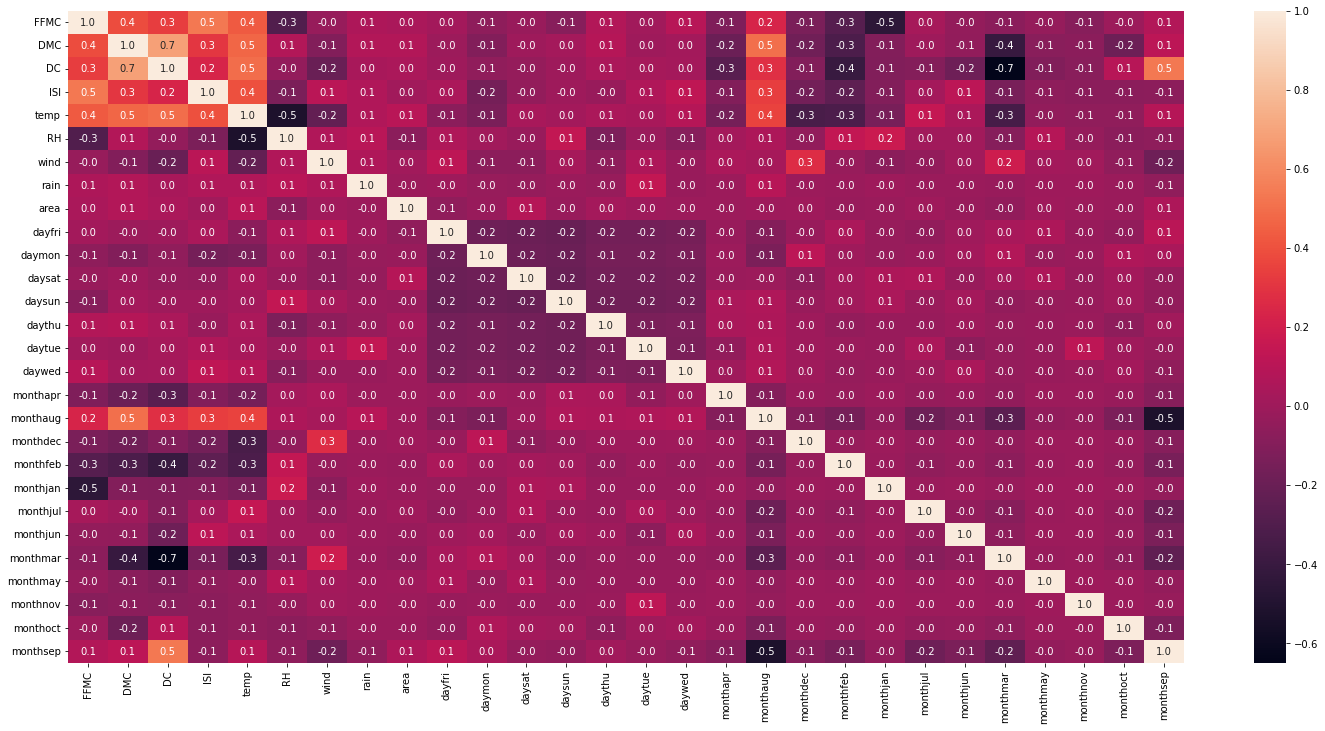

In [15]:
plt.figure(figsize=(25,12))
sns.heatmap(forest_df.corr(),annot=True,fmt='0.1f')

<AxesSubplot:xlabel='month', ylabel='temp'>

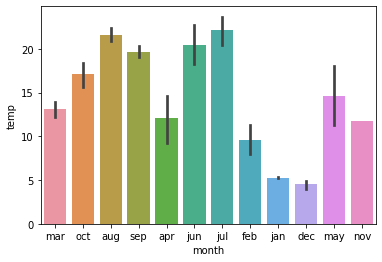

In [16]:
sns.barplot(data=forest_df,x=forest_df['month'],y=forest_df['temp'])

<AxesSubplot:xlabel='month', ylabel='rain'>

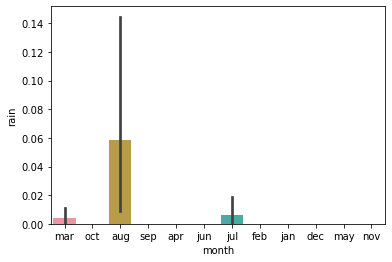

In [17]:
sns.barplot(data=forest_df,x=forest_df['month'],y=forest_df['rain'])

<AxesSubplot:xlabel='month', ylabel='RH'>

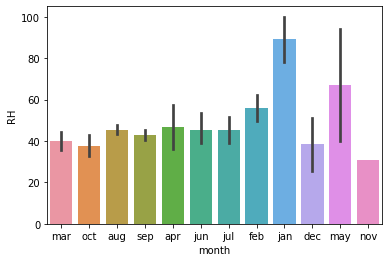

In [18]:
sns.barplot(data=forest_df,x=forest_df['month'],y=forest_df['RH'])

<AxesSubplot:xlabel='month', ylabel='wind'>

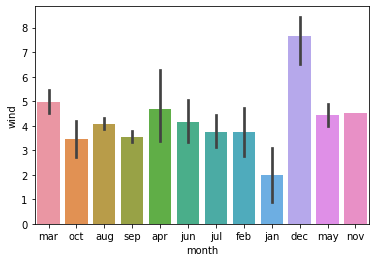

In [19]:
sns.barplot(data=forest_df,x=forest_df['month'],y=forest_df['wind'])

<AxesSubplot:xlabel='temp', ylabel='area'>

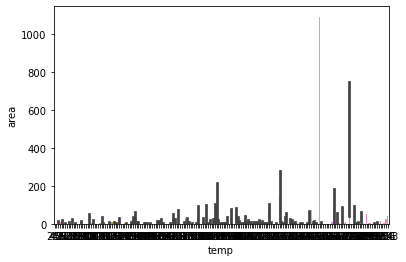

In [20]:
sns.barplot(data=forest_df,x=forest_df['temp'],y=forest_df['area'])

<AxesSubplot:xlabel='size_category', ylabel='temp'>

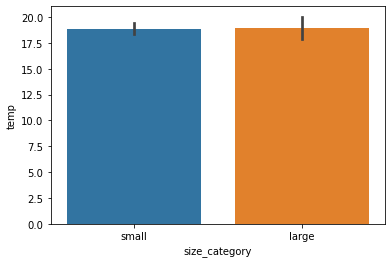

In [21]:
sns.barplot(data=forest_df,x=forest_df['size_category'],y=forest_df['temp'])

<AxesSubplot:xlabel='size_category', ylabel='area'>

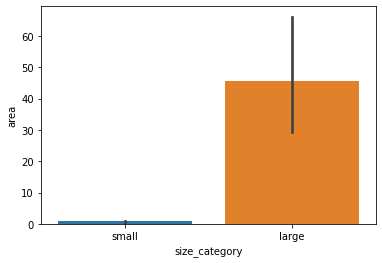

In [22]:
sns.barplot(data=forest_df,x=forest_df['size_category'],y=forest_df['area'])

<AxesSubplot:xlabel='size_category', ylabel='RH'>

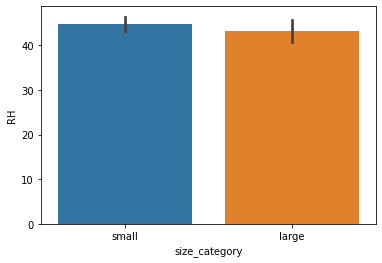

In [23]:
sns.barplot(data=forest_df,x=forest_df['size_category'],y=forest_df['RH'])

<AxesSubplot:xlabel='size_category', ylabel='wind'>

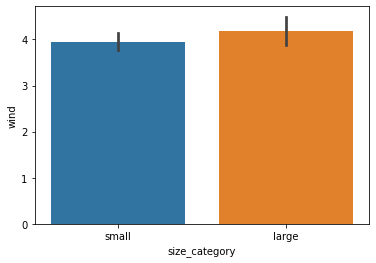

In [24]:
sns.barplot(data=forest_df,x=forest_df['size_category'],y=forest_df['wind'])

<AxesSubplot:xlabel='size_category', ylabel='rain'>

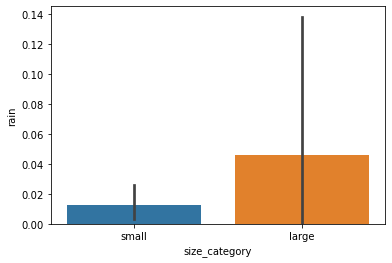

In [25]:
sns.barplot(data=forest_df,x=forest_df['size_category'],y=forest_df['rain'])

# Data Prepocessing

In [26]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [27]:
# Normalization of the features
minmax = MinMaxScaler()

# FFMC, DMC, DC, ISI, RH
forest_df['FFMC'] = minmax.fit_transform(np.array(forest_df['FFMC']).reshape(-1, 1))
forest_df['DMC'] = minmax.fit_transform(np.array(forest_df['DMC']).reshape(-1, 1))
forest_df['DC'] = minmax.fit_transform(np.array(forest_df['DC']).reshape(-1, 1))
forest_df['ISI'] = minmax.fit_transform(np.array(forest_df['ISI']).reshape(-1, 1))
forest_df['RH'] = minmax.fit_transform(np.array(forest_df['RH']).reshape(-1, 1))

In [28]:
forest_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,0.811613,0.191592,0.771315,0.033868,27.8,0.200000,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,0.811613,0.191592,0.771315,0.033868,21.9,0.658824,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,0.811613,0.191592,0.771315,0.033868,21.2,0.647059,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,0.976774,0.499311,0.711622,0.201426,25.6,0.317647,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [29]:
label_encoder = LabelEncoder()
forest_df['size_category']= label_encoder.fit_transform(forest_df['size_category'])

In [30]:
forest_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,0.811613,0.191592,0.771315,0.033868,27.8,0.200000,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,0.811613,0.191592,0.771315,0.033868,21.9,0.658824,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,0.811613,0.191592,0.771315,0.033868,21.2,0.647059,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,0.976774,0.499311,0.711622,0.201426,25.6,0.317647,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
forest_df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.928318,0.378264,0.633329,0.160814,18.889168,0.344567,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,0.071227,0.220698,0.290918,0.081274,5.806625,0.191970,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,0.000000,0.000000,0.000000,0.000000,2.200000,0.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922581,0.232598,0.504046,0.115865,15.500000,0.211765,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.940645,0.369400,0.769673,0.149733,19.300000,0.317647,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.957419,0.486906,0.827958,0.192513,22.800000,0.447059,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,33.300000,1.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
y= forest_df['size_category']
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [33]:
x= forest_df.drop(columns='size_category')
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,mar,fri,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,oct,tue,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,oct,sat,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,mar,fri,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,mar,sun,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,0.811613,0.191592,0.771315,0.033868,27.8,0.200000,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,0.811613,0.191592,0.771315,0.033868,21.9,0.658824,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,0.811613,0.191592,0.771315,0.033868,21.2,0.647059,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,0.976774,0.499311,0.711622,0.201426,25.6,0.317647,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
x.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],
      dtype='object')

In [35]:
x.drop(columns=['month','day'],inplace=True)
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,27.8,0.200000,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,0.811613,0.191592,0.771315,0.033868,21.9,0.658824,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,0.811613,0.191592,0.771315,0.033868,21.2,0.647059,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,0.976774,0.499311,0.711622,0.201426,25.6,0.317647,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the dataset into training and testing

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((413, 28), (104, 28), (413,), (104,))

In [39]:
x_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
386,0.926452,0.329428,0.870881,0.203209,20.6,0.470588,5.4,0.0,24.59,0,...,0,0,0,0,0,0,0,0,0,1
56,0.923871,0.274294,0.847074,0.112299,17.8,0.564706,4.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
457,0.941935,0.655755,0.736484,0.139037,19.9,0.411765,4.0,0.0,82.75,0,...,0,0,0,0,0,0,0,0,0,0
60,0.910968,0.172984,0.110590,0.171123,11.5,0.282353,5.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
229,0.948387,0.278084,0.554591,0.212121,16.4,0.329412,4.0,0.0,71.30,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.935484,0.162646,0.105430,0.222816,15.8,0.141176,7.6,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
277,0.860645,0.083735,0.400844,0.046346,4.6,0.070588,8.5,0.0,10.73,0,...,1,0,0,0,0,0,0,0,0,0
9,0.952258,0.299449,0.810015,0.126560,22.8,0.294118,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
359,0.952258,0.416609,0.916852,0.181818,21.1,0.282353,2.2,0.0,8.12,1,...,0,0,0,0,0,0,0,0,0,1


In [40]:
x_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
213,0.889032,0.176085,0.112466,0.089127,11.0,0.364706,5.8,0.0,27.35,0,...,0,0,0,0,0,1,0,0,0,0
435,0.930323,0.288077,0.432391,0.099822,23.8,0.423529,1.8,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0
343,0.939355,0.444521,0.937258,0.133690,15.9,0.423529,4.5,0.0,2.18,0,...,0,0,0,0,0,0,0,0,0,1
230,0.957419,0.455548,0.811188,0.163993,26.4,0.070588,4.5,0.0,88.49,0,...,0,0,0,0,0,0,0,0,0,1
171,0.863226,0.307719,0.705641,0.117647,17.4,0.411765,4.0,0.0,2.69,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.963871,0.497243,0.836754,0.144385,29.6,0.141176,2.7,0.0,1.46,0,...,0,0,0,0,0,0,0,0,0,1
49,0.889032,0.176085,0.112466,0.089127,11.0,0.364706,5.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
100,0.938065,0.486906,0.696024,0.188948,19.8,0.282353,5.4,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
153,0.975484,0.289456,0.802627,0.283422,20.1,0.376471,4.9,0.0,1.46,1,...,0,0,0,0,0,0,0,0,0,1


In [41]:
y_train.unique()

array([0, 1])

In [42]:
y_test.unique()

array([0, 1])

In [43]:
from tensorflow.keras import layers

In [44]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['accuracy'])
    return model

In [45]:
tuner = RandomSearch(build_model,objective='accuracy',
                     max_trials=5,  executions_per_trial=3,directory='project')

INFO:tensorflow:Reloading Tuner from project\untitled_project\tuner0.json


In [46]:
tuner.search_space_summary()

Search space summary
Default search space size: 22
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_6

In [47]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))


INFO:tensorflow:Oracle triggered exit


In [48]:
tuner.results_summary()

Results summary
Results in project\untitled_project
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 3 summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 32
learning_rate: 0.0001
units_2: 96
units_3: 64
units_4: 96
units_5: 96
units_6: 96
units_7: 64
units_8: 96
units_9: 64
units_10: 64
units_11: 64
units_12: 64
units_13: 64
units_14: 32
units_15: 96
units_16: 96
units_17: 32
Score: 0.99435027440389

Trial 4 summary
Hyperparameters:
num_layers: 20
units_0: 64
units_1: 32
learning_rate: 0.01
units_2: 96
units_3: 32
units_4: 96
units_5: 64
units_6: 32
units_7: 64
units_8: 32
units_9: 64
units_10: 96
units_11: 32
units_12: 96
units_13: 64
units_14: 64
units_15: 96
units_16: 32
units_17: 32
units_18: 32
units_19: 32
Score: 0.49331573645273846

Trial 0 summary
Hyperparameters:
num_layers: 16
units_0: 32
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32


In [49]:
x_train.shape

(413, 28)

In [50]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(96,input_dim=28,activation='relu'))
    model1.add(Dense(96,input_dim=28,activation='relu'))
    model1.add(Dense(96,input_dim=28,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))   
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.01)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["accuracy"])
    return model1

In [51]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [52]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.905 total time=   3.5s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.905 total time=   2.8s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.857 total time=   2.8s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.952 total time=   3.1s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=1.000 total time=   2.6s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

[CV 3/5; 9/16] END ....batch_size=40, epochs=10;, score=0.857 total time=   2.6s
[CV 4/5; 9/16] START batch_size=40, epochs=10...................................
[CV 4/5; 9/16] END ....batch_size=40, epochs=10;, score=0.952 total time=   2.9s
[CV 5/5; 9/16] START batch_size=40, epochs=10...................................
[CV 5/5; 9/16] END ....batch_size=40, epochs=10;, score=0.950 total time=   2.6s
[CV 1/5; 10/16] START batch_size=40, epochs=50..................................
[CV 1/5; 10/16] END ...batch_size=40, epochs=50;, score=1.000 total time=   3.0s
[CV 2/5; 10/16] START batch_size=40, epochs=50..................................
[CV 2/5; 10/16] END ...batch_size=40, epochs=50;, score=0.905 total time=   3.6s
[CV 3/5; 10/16] START batch_size=40, epochs=50..................................
[CV 3/5; 10/16] END ...batch_size=40, epochs=50;, score=0.857 total time=   4.7s
[CV 4/5; 10/16] START batch_size=40, epochs=50..................................
[CV 4/5; 10/16] END ...batch

In [53]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9709523797035218, using {'batch_size': 50, 'epochs': 100}
0.9238095283508301,0.04856208771111941 with {'batch_size': 10, 'epochs': 10}
0.9133333325386047,0.08205965028129533 with {'batch_size': 10, 'epochs': 50}
0.9042857170104981,0.09500446827224789 with {'batch_size': 10, 'epochs': 100}
0.9138095259666443,0.0817107274432173 with {'batch_size': 10, 'epochs': 200}
0.9233333349227906,0.06438968157120041 with {'batch_size': 20, 'epochs': 10}
0.9328571438789368,0.03786836849291358 with {'batch_size': 20, 'epochs': 50}
0.9323809504508972,0.03884967513690588 with {'batch_size': 20, 'epochs': 100}
0.8757142901420594,0.0707651659421787 with {'batch_size': 20, 'epochs': 200}
0.9233333349227906,0.037748416944892504 with {'batch_size': 40, 'epochs': 10}
0.922857141494751,0.04897127655713655 with {'batch_size': 40, 'epochs': 50}
0.9133333325386047,0.08205965028129533 with {'batch_size': 40, 'epochs': 100}
0.922857141494751,0.04897127655713655 with {'batch_size': 40, 'epochs': 200}
0.951428

In [97]:
#Final Model after hyperparameter tunning

In [98]:
from keras.layers import Dropout

In [221]:
model_final = Sequential()
model_final.add(Dense(96,input_dim=28,activation='relu'))
model_final.add(Dense(96,input_dim=28,activation='relu'))
model_final.add(Dense(96,input_dim=28,activation='relu'))
model_final.add(Dense(96,input_dim=28,activation='relu'))
model_final.add(Dense(96,input_dim=28,activation='relu'))
model_final.add(Dense(96,input_dim=28,activation='relu'))
model_final.add(Dense(64,activation='relu'))
model_final.add(Dense(64,activation='relu'))
model_final.add(Dense(32,activation="relu"))
model_final.add(Dense(units=1,activation="linear"))
    
adam=Adam(learning_rate=0.0001)
model_final.compile(loss=tf.keras.losses.Huber(),optimizer = adam,metrics=["accuracy"])

In [222]:
# Fit the model
history=model_final.fit(x_train,y_train, validation_split=0.33, epochs=100, batch_size=50)

Epoch 1/100
6/6 [==============================] - 1s 62ms/step - loss: 0.3881 - accuracy: 0.2572 - val_loss: 0.3221 - val_accuracy: 0.2774
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.3018 - accuracy: 0.2572 - val_loss: 0.2519 - val_accuracy: 0.2774
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.2320 - accuracy: 0.2536 - val_loss: 0.1887 - val_accuracy: 0.2774
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 0.1729 - accuracy: 0.2826 - val_loss: 0.1374 - val_accuracy: 0.4453
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.1230 - accuracy: 0.5580 - val_loss: 0.0943 - val_accuracy: 0.7445
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0814 - accuracy: 0.8080 - val_loss: 0.0665 - val_accuracy: 0.8248
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0584 - accuracy: 0.8478 - val_loss: 0.0540 - val_accuracy: 0.8394
Epoch 8/100
6/6 [====

6/6 [==============================] - 0s 11ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9781
Epoch 60/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9854
Epoch 61/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9781
Epoch 62/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9781
Epoch 63/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9708
Epoch 64/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9854
Epoch 65/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9708
Epoch 66/100
6/6 [=============

In [209]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [223]:
y_predict = model_final.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [224]:
classification_report(y_test,y_predict.astype('int32'))

'              precision    recall  f1-score   support\n\n           0       0.43      1.00      0.61        30\n           1       1.00      0.47      0.64        74\n\n    accuracy                           0.62       104\n   macro avg       0.72      0.74      0.62       104\nweighted avg       0.84      0.62      0.63       104\n'

In [228]:
print(confusion_matrix(y_test,y_predict.astype('int32')))

[[30  0]
 [39 35]]


In [229]:
accuracy_score(y_test,y_predict.astype('int32'))

0.625